In [92]:
!pip install pycce
!pip install ase

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pycce as pc
import ase
from mpl_toolkits import mplot3d

In [94]:
seed = 8805
np.set_printoptions(suppress=True, precision=5)
#from https://pycce.readthedocs.io/en/latest/tutorials/diamond_nv.html
filename="ti.xyz"
xyz = open(filename)
#print(xyz.read()) #prints the hole file
n_atoms = int(xyz.readline())
#print(n_atoms) #number of atoms 
title = xyz.readline()
xr=[]
yr=[]
zr=[]
xtr=[]
ytr=[]
ztr=[]
xcr=[]
ycr=[]
zcr=[]
for line in xyz:
    atom,x,y,z = line.split() #line.split() mthod is to split a string into a list
    # Titanium atoms
    if atom == 'Ti':
        xtr.append(float(x))
        ytr.append(float(y))
        ztr.append(float(z))
    # Carbon atoms 
    elif atom == 'C':
        xcr.append(float(x))
        ycr.append(float(y))
        zcr.append(float(z))
    # Hydrogen atoms
    else:
        xr.append(float(x))
        yr.append(float(y))
        zr.append(float(z))


__Creating the bath__

from https://pycce.readthedocs.io/en/latest/tutorials/sic_vv.html

In [95]:
## Set up unit cell with (a, b, c, alpha, beta, gamma)
titanium=pc.BathCell(11.1780,10.9930,8.4690,90.0,90.0,90.0)
# z axis in cell coordinates
titanium.zdir=[0,0,1]


#generate the unit cell (supercell)
for i in range(n_atoms):
    titanium.add_atoms((str(atom),[float(x),float(y),float(z)])), #define positions of atoms in the unit cell
#Generate bath spin positions
atoms=titanium.gen_supercell(200,seed=seed)
#https://pycce.readthedocs.io/en/latest/tutorials/sic_vv.html


central_spin = pc.Center((3.87004716,  2.74825000,  4.58613288), spin=1, D=0, E=0, gyro=- 17608.59705, alpha=None, beta=None, detuning=0)
print(central_spin)
#https://pycce.readthedocs.io/en/latest/center.html

Center
(s: 1.0,
xyz:
[3.87005 2.74825 4.58613],
zfs:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]],
gyro:
-17608.59705)


Visualization

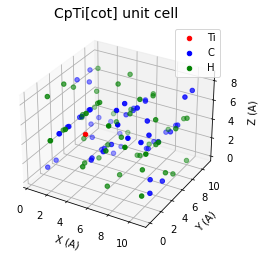

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(xtr,ytr,ztr, c='r', marker='o', label='Ti')
ax.scatter3D(xcr,ycr,zcr, c='b', marker='o', label='C')
ax.scatter3D(xr,yr,zr, c='green', marker='o', label='H')

ax.legend()
ax.set_xlabel('X (A)')
ax.set_ylabel('Y (A)')
ax.set_zlabel('Z (A)')

plt.title("CpTi[cot] unit cell", fontsize = 14) 

plt.show()

Setting the simulator and computing coherence function

In [97]:
#parameters
cce_order=3
position=[3.87004716,  2.74825000,  4.58613288]
r_bath=40
r_dipole=6
B=np.array([0,0,500])

In [98]:
#CCE Simulation
calc=pc.Simulator(spin=0.5, position=position, bath=atoms, r_bath=r_bath, magnetic_field=B, pulses=1, r_dipole=r_dipole, order=cce_order)

In [99]:
print(calc)

Simulator for center array of size 1.
magnetic field:
array([  0.,   0., 500.])

Parameters of cluster expansion:
r_bath: 40
r_dipole: 6
order: 1

Bath consists of 59724 spins.

Clusters include:
59724  clusters of order 1.



In [103]:
time_steps = np.linspace(0, 2 ,200) #time points in ms at which the coherence function is computed
#use coherence function with conventional CCE
l_conv = calc.compute(time_steps, pulses=n, magnetic_field=b, method='cce', quantity='coherence', as_delay=False)

In [91]:
print(l_conv)

[1.-0.j]


In [45]:
%%timeit
calc.compute(time_steps, pulses=n, magnetic_field=B,
             method='cce', quantity='coherence', as_delay=False)

5.72 s ± 93.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


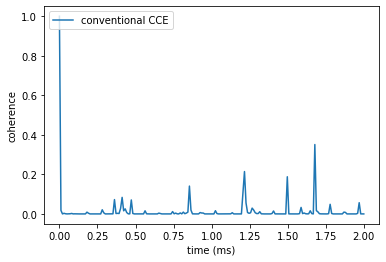

In [104]:
plt.plot(time_steps, l_conv.real, label='conventional CCE')
plt.legend(loc='upper left')
plt.xlabel('time (ms)')
plt.ylabel('coherence');